# Enoncé

Vous avez participé à une compétition sur Kaggle sur le jeu de données de Titanic (celle-ci existe, les curieux peuvent la retrouver sur Kaggle !). Vous avez pour cela à votre disposition [une liste de 891 passagers](https://www.kaggle.com/c/titanic), contenant les caractéristiques suivantes :


- PassengerID : Identifiant du passager
- Survived : Indicateur de survi d'un passager (1 si le passager a survecu, 0 s’il est décédé)
- Pclass: Classe du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe)
- Name : Nom et titre du passager
- Sex : Sexe du passager
- Age : Age du passager (Décimal si inférieur à 1, estimé si de la forme xx.5)
- SibSp : Nombre d’époux, de frères et de soeurs présents à bord
- Parch : Nombre de parents ou d’enfants présents à bord 
- Ticket : Numéro du ticket 
- Fare : Tarif des tickets (Le prix est indiqué en £ et pour un seul achat (peut correspondre à plusieurs tickets)
- Cabin : Numéro de Cabine
- Embarked : Port d’embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)
	 	

# Exercice

La compétition a été l’occasion de revenir sur ce jeu de données très célèbre, et plusieurs tâches étaient attendues, :
- identifier les facteurs favorisants la survie d'un passager par rapport à un autre, en dressant une typologie des survivants
- créer un algorithme qui pourrait prédire la survie d'un individu à partir de ces caractéristiques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import itertools
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime
from os import getcwd
from function import *
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load

## 1. Charger vos données dans un DataFrame Pandas

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"

Chargement des données...


In [3]:
file_name_test = 'titanic_dataset_kaggle_test.csv'
file_name_train = 'titanic_dataset_kaggle_train.csv'

file_separator = ','

df_origin_train = pd.read_csv(file_path+file_name_train, sep=file_separator, index_col="PassengerId")
df_origin_test = pd.read_csv(file_path+file_name_test, sep=file_separator, index_col="PassengerId")

print("Chargement des données train:", df_origin_train.shape, ", test:", df_origin_test.shape, ".................................. END")

Chargement des données train: (891, 11) , test: (418, 10) .................................. END


In [4]:
df_origin_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train = df_origin_train.copy()
df_test = df_origin_test.copy()

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

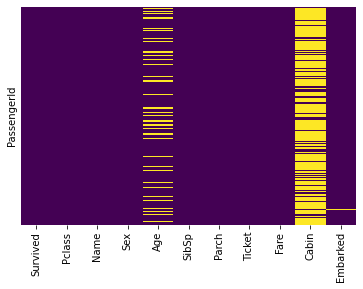

In [10]:
sns.heatmap(df_train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

<AxesSubplot:ylabel='PassengerId'>

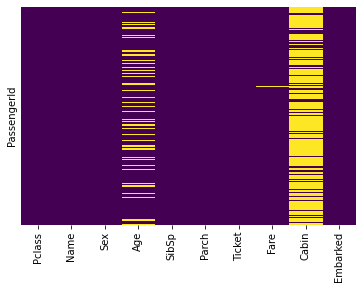

In [11]:
sns.heatmap(df_test.isnull(), yticklabels=False,cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

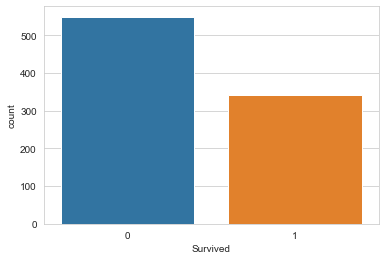

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_train)

#  2. Typage et Organisation des données

In [13]:
df_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [14]:
df_test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [15]:
def process_column_cat(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df[column_name+'_cat'] = df[column_name].cat.codes
    df[column_name+'_cod'] = preprocessing.LabelEncoder().fit_transform(df[column_name])
    return df

In [16]:
df_train = process_column_cat(df_train, 'Sex')
df_test = process_column_cat(df_test, 'Sex')

<AxesSubplot:ylabel='PassengerId'>

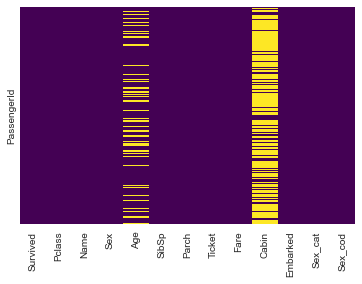

In [17]:
sns.heatmap(df_train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [18]:
df_train.dtypes

Survived       int64
Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
Sex_cat         int8
Sex_cod        int32
dtype: object

In [19]:
df_test.dtypes

Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
Sex_cat         int8
Sex_cod        int32
dtype: object

## 2.1 Ajout du titre du passager

In [20]:
def split_name(df_copy, df_type="train"):
    ser_name_split = df_copy["Name"].dropna().str.split("(, |\. )", n=0, expand=True)
    if "train" in df_type:
        ser_name_split.loc[ser_name_split[6]=="Barrett)", 4]=ser_name_split.loc[ser_name_split[6]=="Barrett)", 4] +". " + ser_name_split.loc[ser_name_split[6]=="Barrett)", 6]
        ser_name_split[ser_name_split[6]=="Barrett)"]
    if "train" in df_type:
        ser_name_split = ser_name_split.drop(columns=[1,3,5, 6])
    elif "test" in df_type:
        ser_name_split = ser_name_split.drop(columns=[1,3])
    # Renommage des colonnes
    ser_name_split = ser_name_split.rename(columns={0 : "Last_name", 2:"Titre", 4:"First_name"})
    ser_name_split.loc[(ser_name_split["Titre"]  == "Mlle") | (ser_name_split["Titre"]  == "Lady"), "Titre"] = "Miss"
    ser_name_split.loc[ser_name_split["Titre"]  == "Mme", "Titre"] = "Mrs"
    ser_name_split.loc[(ser_name_split["Titre"]  == "Sir") | (ser_name_split["Titre"]  == "Don"), "Titre"] = "Mr"
    # Fusion des DF
    df = pd.concat([df_copy, ser_name_split], axis=1)

    df = process_column_cat(df, 'Titre')
    return df
    
    

In [21]:
df_train = split_name(df_train.copy(), "train")
df_test = split_name(df_test.copy(), "test")

In [22]:
df_train = process_column_cat(df_train, 'Embarked')
df_test = process_column_cat(df_test, 'Embarked')

# 3. Nettoyer votre Dataset avec drop(), dropna() 

CORR ------------------


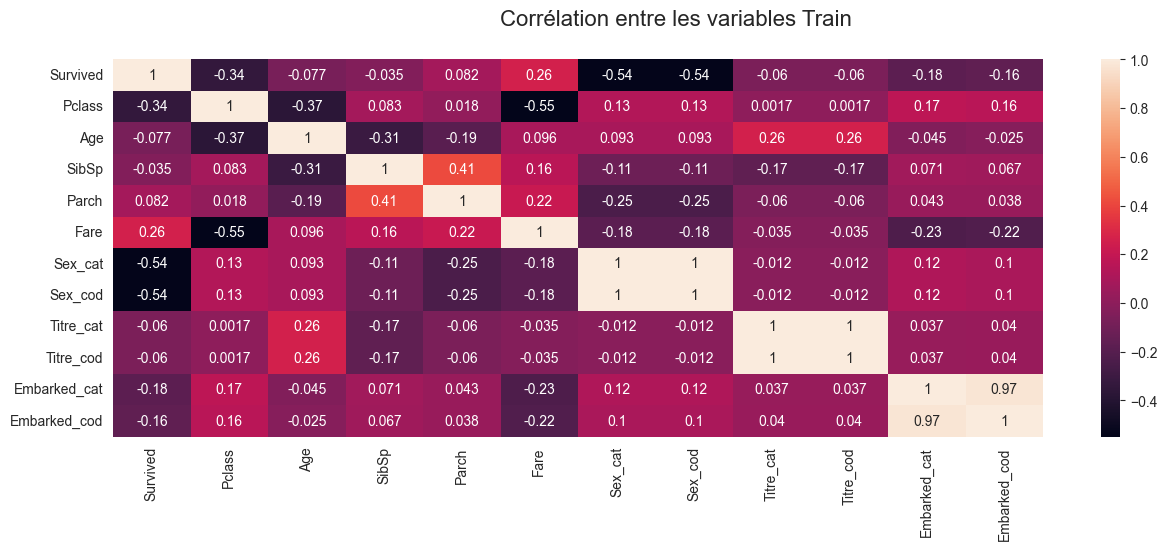

CORR ------------------


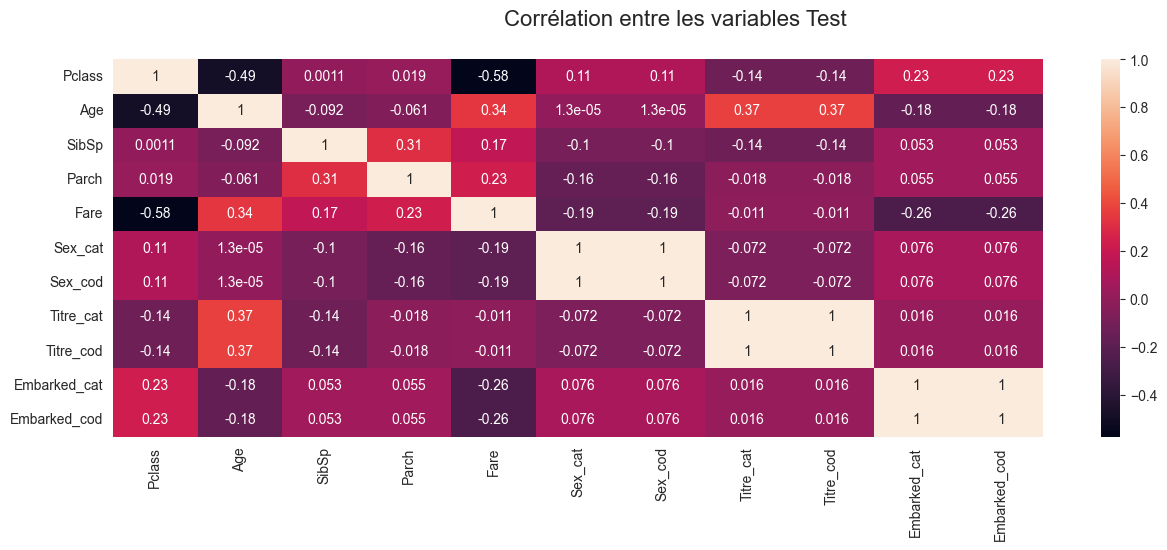

In [23]:
def corr(df, title="Train"):
    ##on utilise data.corr et le heatmap de seborn
    corr_df = df.corr()
    print("CORR ------------------")
    #print(corr_df, "\n")
    figure, ax = color_graph_background(1,1)
    figure.set_size_inches(15, 5, forward=True)
    figure.set_dpi(100)
    figure.suptitle("Corrélation entre les variables "+title, fontsize=16)
    sns.heatmap(corr_df, annot=True)
    plt.show()

corr(df_train, "Train")
corr(df_test, "Test")

## 3.1. PONT > traiter les ponts

Compléter les cabines pour les valeurs manquantes


De nombreuses valeurs manquantes parsèment le jeu de données.
Le nombre sur **Cabin** peut potentiellement facilement s'expliquer assez facilement : cela correspond pour une grande partie à des individus qui n'avaient simplement pas de cabine. En effet seuls les passagers de 1ère classe et certains de 2ème disposaient d'un numéro de cabine pour leur voyage.

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

In [24]:
def process_deck_step1(df):
    df['pont']= df['Cabin'].str[0]
    # La cabine T est une cabine de classe supérieure située sur le pont A.
    df.loc[df['pont'] == 'T','pont'] = 'A'
    return df

In [25]:
df_train = process_deck_step1(df_train)
df_test = process_deck_step1(df_test)

In [26]:
def process_deck_3(df_train_param, df_test_param, deck_name = "deck"):
    colName='pont'
    df = df_train_param.copy()
    df[deck_name]= df[colName]
    
    # On duplique la colonne de pont pour pouvoir faire le value count et ordonner par nombre d'occurrences
    df[colName+"2"] = df[colName]
    prixDeck = df.loc[:,['Survived', 'Pclass', 'Embarked', 'Fare', colName, colName+"2"]].groupby(['Survived', 'Pclass', 'Embarked', 'Fare', colName])[colName+"2"].count().reset_index().sort_values(colName+"2", ascending=False)
    mask = df[deck_name].isnull()

    df.loc[mask,deck_name] = df.loc[mask,:].apply(lambda x: get_closest3(x['Survived'], x['Pclass'], x['Fare'], x['Embarked'], prixDeck), axis=1)
    print(deck_name,"TRAIN NA :",df[deck_name].isnull().sum())
    df_test = None
    if df_test_param is not None:
        print("Test process")
        df_test = df_test_param.copy()
        df_test[deck_name]= df_test[colName]
        df_test[colName+"2"] = df_test[colName]
        # on complète le tableau prixDeck avec les informations de la df de test
        prixDeck2 = df_test.loc[:,['Pclass', 'Embarked', 'Fare', colName, colName+"2"]].groupby(['Pclass', 'Embarked', 'Fare', colName])[colName+"2"].count().reset_index().sort_values(colName+"2", ascending=False)    
        prixDeck2["Survived"] = np.nan
        prixDeck2 = prixDeck2[['Survived', 'Pclass', 'Embarked', 'Fare', colName, colName+"2"]]
        # concaténation des 2 df
        prixDeck3 = prixDeck.append(prixDeck2).sort_values(colName+"2", ascending=False)    
        # Nous allons nous baser sur les données de train pour déterminer le pont
        mask2 = df_test[deck_name].isnull()
        df_test.loc[mask2,deck_name] = df_test.loc[mask2,:].apply(lambda x: get_closest3(None, x['Pclass'], x['Fare'], x['Embarked'], prixDeck3), axis=1)
        print(deck_name," TEST NA :",df_test[deck_name].isnull().sum())
        df_test[deck_name] = df_test[deck_name].fillna("X")
    df[deck_name] = df[deck_name].fillna("X")
    return df, df_test

In [27]:
df_train, df_test = process_deck_3(df_train, df_test)
df_train.head()

deck TRAIN NA : 0
Test process
deck  TEST NA : 0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Last_name,Titre,First_name,Titre_cat,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,Braund,Mr,Owen Harris,7,7,2,2,NaN,G,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,Cumings,Mrs,John Bradley (Florence Briggs Thayer),8,8,0,0,C,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,Heikkinen,Miss,Laina,6,6,2,2,NaN,G,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,Futrelle,Mrs,Jacques Heath (Lily May Peel),8,8,2,2,C,C,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,Allen,Mr,William Henry,7,7,2,2,NaN,B,NaN


In [28]:
df_test["deck"].isna().sum()

0

In [29]:
df_test["deck"].isnull().sum()

0

In [30]:
df_test["deck"].value_counts()

F    105
C     71
A     60
E     50
G     47
B     44
D     41
Name: deck, dtype: int64

In [31]:
df_train = process_column_cat(df_train, 'deck')

In [32]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_cat', 'Sex_cod', 'Last_name', 'Titre',
       'First_name', 'Titre_cat', 'Titre_cod', 'Embarked_cat', 'Embarked_cod',
       'pont', 'deck', 'pont2'],
      dtype='object')

In [33]:
df_test = process_column_cat(df_test, 'deck')

In [34]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,First_name,Titre_cat,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2,deck_cat,deck_cod
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,James,5,5,1,1,NaN,F,NaN,5,5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,James (Ellen Needs),6,6,2,2,NaN,F,NaN,5,5
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,Thomas Francis,5,5,1,1,NaN,B,NaN,1,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,Albert,5,5,2,2,NaN,A,NaN,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,Alexander (Helga E Lindqvist),6,6,2,2,NaN,E,NaN,4,4


In [35]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,First_name,Titre_cat,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2,deck_cat,deck_cod
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,James,5,5,1,1,NaN,F,NaN,5,5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,James (Ellen Needs),6,6,2,2,NaN,F,NaN,5,5
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,Thomas Francis,5,5,1,1,NaN,B,NaN,1,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,Albert,5,5,2,2,NaN,A,NaN,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,Alexander (Helga E Lindqvist),6,6,2,2,NaN,E,NaN,4,4


In [36]:
df_train['deck'].value_counts()

G    390
B    131
C     95
E     80
F     77
A     62
D     56
Name: deck, dtype: int64

In [37]:
df_test['deck'].value_counts()

F    105
C     71
A     60
E     50
G     47
B     44
D     41
Name: deck, dtype: int64

## 3.x Family group

In [38]:
df_train['group'] = df_train['SibSp'] + df_train['Parch']
df_test['group'] = df_test['SibSp'] + df_test['Parch']

## 3.2. Traiter l'âge

<mark>Faire une régression linéaire pour estimer l'âge pour les données manquantes</mark>    
par rapport à la classe, au billet, ....

Compléter les cabines pour les valeurs manquantes


De nombreuses valeurs manquantes parsèment le jeu de données.
Le nombre sur **Cabin** peut potentiellement facilement s'expliquer assez facilement : cela correspond pour une grande partie à des individus qui n'avaient simplement pas de cabine. En effet seuls les passagers de 1ère classe et certains de 2ème disposaient d'un numéro de cabine pour leur voyage.

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

In [39]:
def process_age(df_age_full, type="Train"):
    df_age_full["age_formula"] = df_age_full['Age']
    mask = df_age_full["age_formula"].notnull()
    formala = 'Age ~ Survived + Pclass + Sex_cat + Titre + Titre_cat + SibSp + Parch + Fare + Embarked + Embarked_cat + deck + deck_cat'
    if "Test" in type:
        formala = 'Age ~ Pclass + Sex_cat + Titre + Titre_cat + SibSp + Parch + Fare + Embarked + Embarked_cat + deck + deck_cat'
    lr = smf.ols(formula=formala, data=df_age_full.loc[mask,:]).fit()
    df_age_full.loc[~mask, 'age_formula'] = round(lr.predict(df_age_full.loc[~mask,:].drop(columns=['age_formula'])),0)
    df_age_full = df_age_full.drop(columns=['Age'])
    df_age_full = df_age_full.rename(columns={'age_formula':"Age"})
    return df_age_full

In [40]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_cat', 'Sex_cod', 'Last_name', 'Titre',
       'First_name', 'Titre_cat', 'Titre_cod', 'Embarked_cat', 'Embarked_cod',
       'pont', 'deck', 'pont2', 'deck_cat', 'deck_cod', 'group'],
      dtype='object')

In [41]:
df_train = process_age(df_train, "Train")
df_train.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Sex_cat           0
Sex_cod           0
Last_name         0
Titre             0
First_name        0
Titre_cat         0
Titre_cod         0
Embarked_cat      0
Embarked_cod      0
pont            687
deck              0
pont2           687
deck_cat          0
deck_cod          0
group             0
Age               0
dtype: int64

In [42]:
df_test = process_age(df_test, "Test")
df_test.isnull().sum()

Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
Sex_cat           0
Sex_cod           0
Last_name         0
Titre             0
First_name        0
Titre_cat         0
Titre_cod         0
Embarked_cat      0
Embarked_cod      0
pont            327
deck              0
pont2           327
deck_cat          0
deck_cod          0
group             0
Age               0
dtype: int64

## 3.3. Suppression des colonnes inutiles

In [43]:
df_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2,deck_cat,deck_cod,group,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,...,7,2,2,NaN,G,NaN,6,6,1,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,...,8,0,0,C,C,C,2,2,1,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,...,6,2,2,NaN,G,NaN,6,6,0,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,...,8,2,2,C,C,C,2,2,1,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,...,7,2,2,NaN,B,NaN,1,1,0,35.0


In [44]:
df_test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,...,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2,deck_cat,deck_cod,group,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,1,...,5,1,1,NaN,F,NaN,5,5,0,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,0,...,6,2,2,NaN,F,NaN,5,5,1,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,1,...,5,1,1,NaN,B,NaN,1,1,0,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,1,...,5,2,2,NaN,A,NaN,0,0,0,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,0,...,6,2,2,NaN,E,NaN,4,4,2,22.0


### 3.1.Z. Nouvelle Heatmap

CORR ------------------


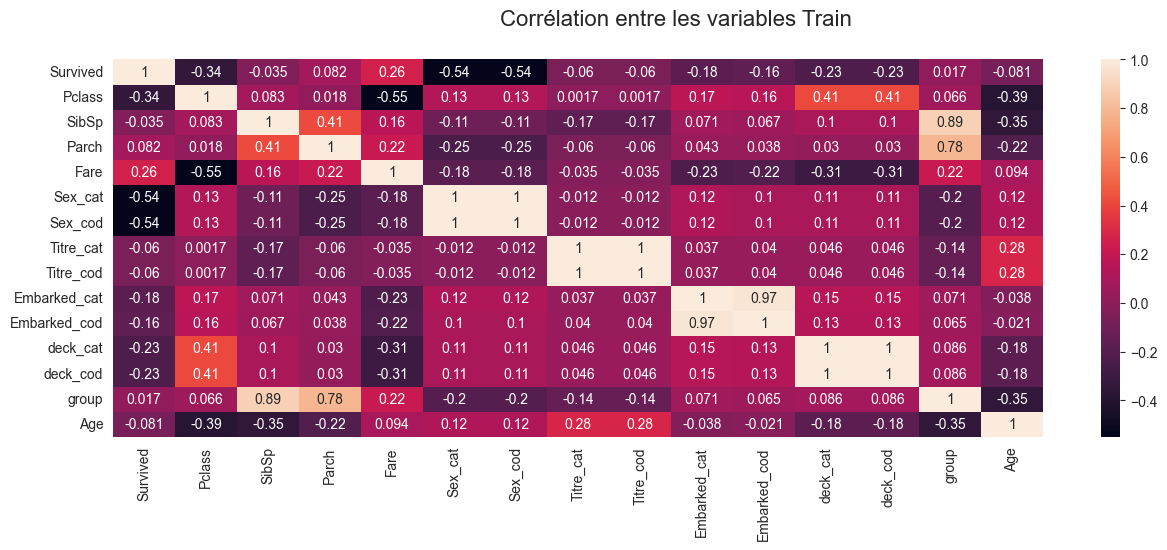

CORR ------------------


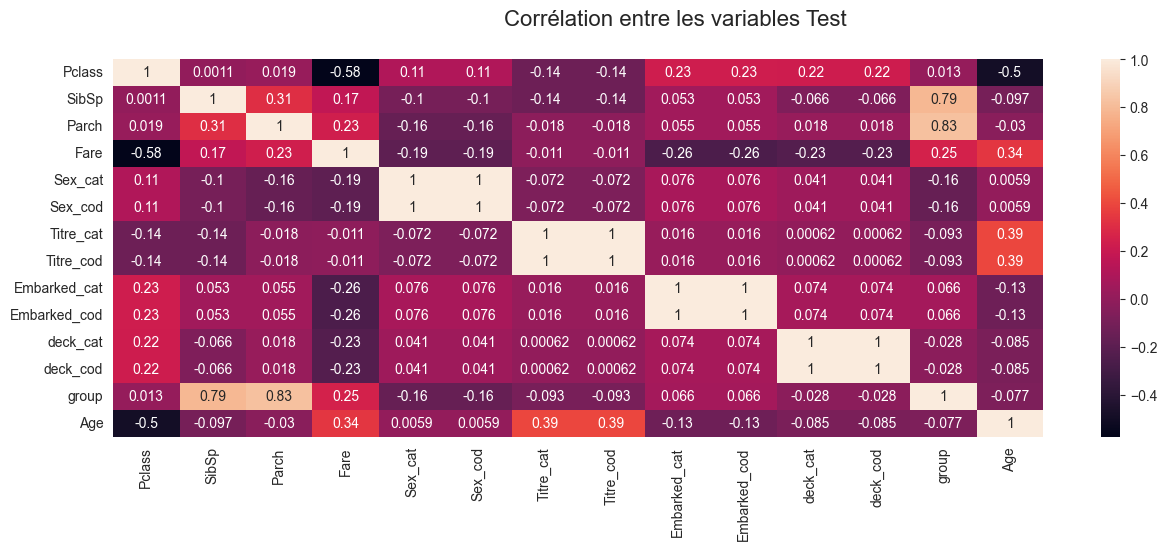

In [45]:
corr(df_train, "Train")
corr(df_test, "Test")

Sauvegarder le fichier traité

In [46]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_cat', 'Sex_cod', 'Last_name', 'Titre',
       'First_name', 'Titre_cat', 'Titre_cod', 'Embarked_cat', 'Embarked_cod',
       'pont', 'deck', 'pont2', 'deck_cat', 'deck_cod', 'group', 'Age'],
      dtype='object')

In [47]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Sex_cat', 'Sex_cod', 'Last_name', 'Titre', 'First_name',
       'Titre_cat', 'Titre_cod', 'Embarked_cat', 'Embarked_cod', 'pont',
       'deck', 'pont2', 'deck_cat', 'deck_cod', 'group', 'Age'],
      dtype='object')

In [48]:
df_train[df_train['deck_cat'] != df_train['deck_cod']]

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Titre_cod,Embarked_cat,Embarked_cod,pont,deck,pont2,deck_cat,deck_cod,group,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [50]:
cols_to_save = ['Survived', 'Pclass', 'Name', 'Age', 'Sex', 'SibSp', 'Parch', 'group', 'Fare',
       'Embarked', 'deck', 'Titre', 'Last_name', 'First_name', 'Sex_cod', 'Titre_cod', 'Embarked_cod', 'deck_cod']
df_train = df_train[cols_to_save]
cols_to_save.remove("Survived")
df_test = df_test[cols_to_save]

In [51]:
def save(df_clean, file_name, type):
    now = datetime.now() # current date and time
    date_time = now.strftime("%Y-%m-%d-%H_%M_%S")
    file_dest_name = file_name.replace(".csv", '_process_' + date_time + '.csv')
    # Création d'un fichier CVS plus léger pour faciliter la phase de d'analyse des données
    df_to_write = df_clean.reset_index()
    df_to_write = df_to_write.rename(columns={"index":"PassengerId"})
    df_to_write.to_csv(file_path+file_dest_name, sep=file_separator, index=False)
    print("File save on:", file_path+file_dest_name)

In [52]:
save(df_train, file_name_train, "Train")
save(df_test, file_name_test, "Test")

File save on: c:\Users\User\WORK\wokspace-simplon3\simplon\projets\titanic\titanic_dataset_kaggle_train_process_2022-01-15-18_44_17.csv
File save on: c:\Users\User\WORK\wokspace-simplon3\simplon\projets\titanic\titanic_dataset_kaggle_test_process_2022-01-15-18_44_17.csv
